In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd


chunk_size = 100000
chunks = []

for chunk in pd.read_csv("used_cars_data.csv", chunksize=chunk_size,low_memory=False):
    chunk.fillna(0, inplace=True)
    chunks.append(chunk)

full_df = pd.concat(chunks, ignore_index=True)
full_df.head()

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,0,0,0,SUV / Crossover,0,Bayamon,0.0,0.0,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,0.0,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,0,0,0,SUV / Crossover,0,San Juan,0.0,0.0,...,A,9-Speed Automatic Overdrive,t86759,S AWD,0.0,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,0,0,0,Sedan,0,Guaynabo,17.0,0.0,...,M,6-Speed Manual,t58994,Base,0.0,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,0,0,0,SUV / Crossover,0,San Juan,0.0,0.0,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,0.0,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,0,0,0,SUV / Crossover,0,San Juan,0.0,0.0,...,A,9-Speed Automatic Overdrive,t86759,S AWD,0.0,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


In [3]:
full_df.shape

(3000040, 66)

In [4]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 66 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   vin                      object 
 1   back_legroom             object 
 2   bed                      object 
 3   bed_height               object 
 4   bed_length               object 
 5   body_type                object 
 6   cabin                    object 
 7   city                     object 
 8   city_fuel_economy        float64
 9   combine_fuel_economy     float64
 10  daysonmarket             int64  
 11  dealer_zip               object 
 12  description              object 
 13  engine_cylinders         object 
 14  engine_displacement      float64
 15  engine_type              object 
 16  exterior_color           object 
 17  fleet                    object 
 18  frame_damaged            object 
 19  franchise_dealer         bool   
 20  franchise_make           object 
 21  front_le

In [5]:
full_df["combine_fuel_economy"].astype('category').value_counts()

combine_fuel_economy
0.0    3000040
Name: count, dtype: int64

In [6]:
full_df["make_name"].astype('category').value_counts()

make_name
Ford          476336
Chevrolet     376892
Toyota        239128
Nissan        217896
Honda         214459
               ...  
Franklin           1
Koenigsegg         1
Hillman            1
Pagani             1
Rover              1
Name: count, Length: 100, dtype: int64

In [7]:
full_df["vehicle_damage_category"].astype('category').value_counts()

vehicle_damage_category
0.0    3000040
Name: count, dtype: int64

In [8]:
full_df["is_certified"].astype('category').value_counts()

is_certified
0.0    3000040
Name: count, dtype: int64

In [52]:
# full_df["savings_amount"].astype('category').value_counts()
# full_df["main_picture_url"].astype('category').value_counts()
# full_df["latitude"].astype('category').value_counts()
# full_df["bed"].astype('category').value_counts()
# full_df["bed_height"].astype('category').value_counts()
# full_df["city"].astype('category').value_counts()
# full_df["exterior_color"].astype('category').value_counts()
# full_df["longitude"].astype('category').value_counts()
# full_df["bed_length"].astype('category').value_counts()
# full_df["description"].astype('category').value_counts()
# full_df["dealer_zip"].astype('category').value_counts()
# full_df["sp_name"].astype('category').value_counts()
# full_df["back_legroom"].astype('category').value_counts()
full_df["mileage"].astype('category').value_counts()


mileage
0.0           401286
5.0           150881
10.0          139482
3.0            78297
2.0            76343
               ...  
172959.0           1
172961.0           1
172964.0           1
172965.0           1
99999988.0         1
Name: count, Length: 197577, dtype: int64

In [10]:
columns_to_drop = ['is_certified', 'vehicle_damage_category',"combine_fuel_economy","main_picture_url","latitude","bed","bed_height","bed_length","description","dealer_zip","longitude","latitude","savings_amount","exterior_color","city","sp_name","sp_id","trimId","trim_name","listed_date","listing_color","interior_color","vin","listing_id"]  # List of columns to drop
full_df = full_df.drop(columns=columns_to_drop, axis=1)

In [11]:
# import tensorflow as tf

# if tf.config.list_physical_devices('GPU'):
#     print("Code is running on GPU")
# else:
#     print("Code is running on CPU")

In [12]:
numerical_columns_list = full_df.select_dtypes(include=['number']).columns.tolist()
categorical_columns_list = full_df.select_dtypes(exclude=['number']).columns.tolist()


print("Numerical columns:")
print(numerical_columns_list)
print("\nCategorical columns:")
print(categorical_columns_list)

Numerical columns:
['city_fuel_economy', 'daysonmarket', 'engine_displacement', 'highway_fuel_economy', 'horsepower', 'mileage', 'owner_count', 'price', 'seller_rating', 'year']

Categorical columns:
['back_legroom', 'body_type', 'cabin', 'engine_cylinders', 'engine_type', 'fleet', 'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom', 'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height', 'isCab', 'is_cpo', 'is_new', 'is_oemcpo', 'length', 'major_options', 'make_name', 'maximum_seating', 'model_name', 'power', 'salvage', 'theft_title', 'torque', 'transmission', 'transmission_display', 'wheel_system', 'wheel_system_display', 'wheelbase', 'width']


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

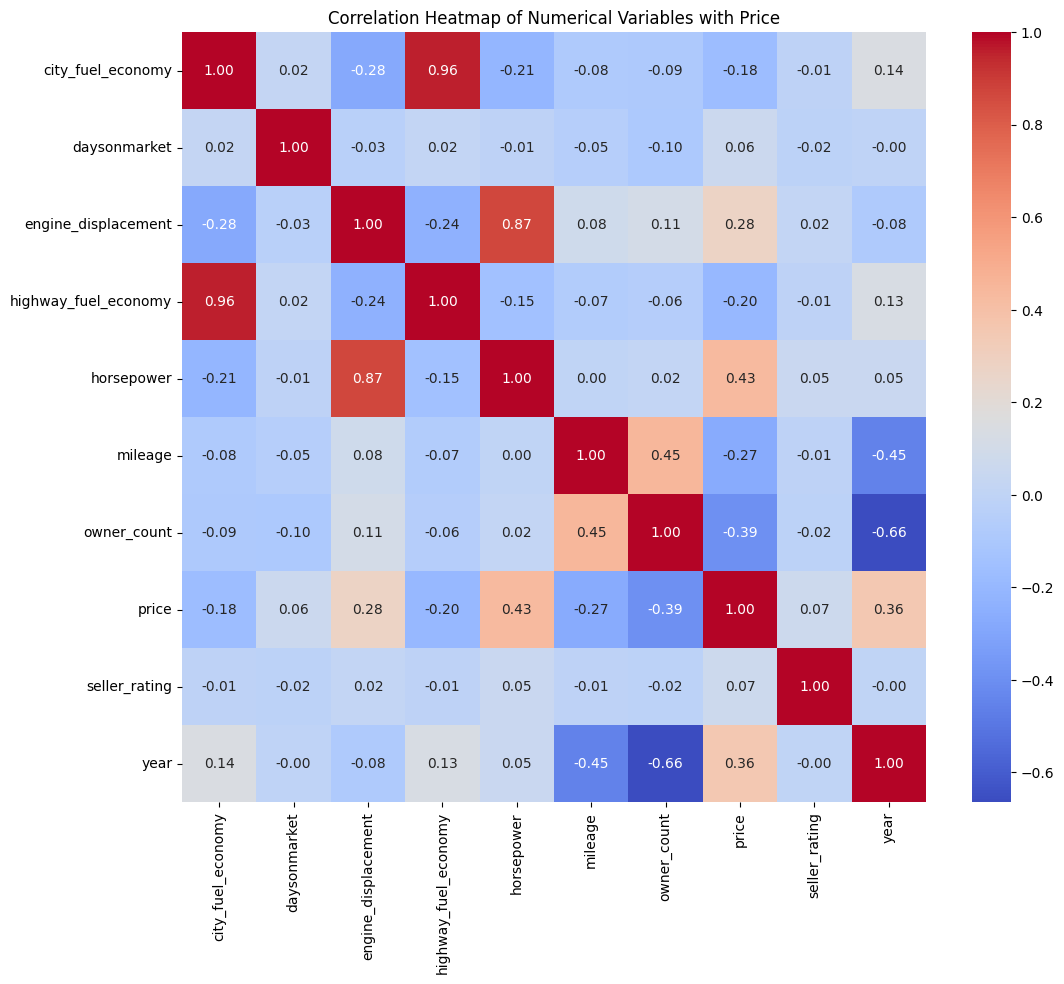

In [14]:
numerical_columns = full_df.select_dtypes(include=['float','int'])
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Numerical Variables with Price')
plt.show()

In [15]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 43 columns):
 #   Column                Dtype  
---  ------                -----  
 0   back_legroom          object 
 1   body_type             object 
 2   cabin                 object 
 3   city_fuel_economy     float64
 4   daysonmarket          int64  
 5   engine_cylinders      object 
 6   engine_displacement   float64
 7   engine_type           object 
 8   fleet                 object 
 9   frame_damaged         object 
 10  franchise_dealer      bool   
 11  franchise_make        object 
 12  front_legroom         object 
 13  fuel_tank_volume      object 
 14  fuel_type             object 
 15  has_accidents         object 
 16  height                object 
 17  highway_fuel_economy  float64
 18  horsepower            float64
 19  isCab                 object 
 20  is_cpo                object 
 21  is_new                bool   
 22  is_oemcpo             object 
 23  length 

In [25]:
part_rows = len(full_df) // 75
part_df = full_df.iloc[:part_rows]

X = part_df.loc[:, [ 'back_legroom',  'body_type',
       'cabin', 'city_fuel_economy', 
       'daysonmarket',  'engine_cylinders',
       'engine_displacement', 'engine_type',  'fleet',
       'frame_damaged',  'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height',
       'highway_fuel_economy', 'horsepower',  'isCab', 'is_cpo',  'is_oemcpo',  'length',
         'major_options', 'make_name', 'maximum_seating',
       'mileage', 'model_name', 'owner_count', 'power',  'salvage',
        'seller_rating',  'theft_title',
       'torque', 'transmission', 'transmission_display', 'wheel_system', 'wheel_system_display',
       'wheelbase', 'width', 'year']]

y = part_df['price']

In [26]:
X.head()

,back_legroom,body_type,cabin,city_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,engine_type,fleet,frame_damaged,...,seller_rating,theft_title,torque,transmission,transmission_display,wheel_system,wheel_system_display,wheelbase,width,year
0,35.1 in,SUV / Crossover,0,0.0,522,I4,1300.0,I4,0,0,...,2.8,0,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,38.1 in,SUV / Crossover,0,0.0,207,I4,2000.0,I4,0,0,...,3.0,0,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,35.4 in,Sedan,0,17.0,1233,H4,2500.0,H4,False,False,...,0.0,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,37.6 in,SUV / Crossover,0,0.0,196,V6,3000.0,V6,0,0,...,3.0,0,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,38.1 in,SUV / Crossover,0,0.0,137,I4,2000.0,I4,0,0,...,3.0,0,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


In [27]:
import pandas as pd


chunk_size = 10000 


all_categorical_chunks = []

total_rows = X.shape[0]

num_chunks = total_rows // chunk_size + 1

for i in range(num_chunks):
    start_idx = i * chunk_size
    end_idx = min((i + 1) * chunk_size, total_rows)
    chunk_X = X.iloc[start_idx:end_idx]
    chunk_categorical = chunk_X.select_dtypes(include=['object'])
    all_categorical_chunks.append(chunk_categorical)

full_df_categorical = pd.concat(all_categorical_chunks)
print(full_df_categorical.head())

# full_df_categorical = X.select_dtypes(include=['object'])
# full_df_categorical.head()

  back_legroom        body_type cabin engine_cylinders engine_type  fleet  \
0      35.1 in  SUV / Crossover     0               I4          I4      0   
1      38.1 in  SUV / Crossover     0               I4          I4      0   
2      35.4 in            Sedan     0               H4          H4  False   
3      37.6 in  SUV / Crossover     0               V6          V6      0   
4      38.1 in  SUV / Crossover     0               I4          I4      0   

  frame_damaged franchise_make front_legroom fuel_tank_volume  ...  \
0             0           Jeep       41.2 in         12.7 gal  ...   
1             0     Land Rover       39.1 in         17.7 gal  ...   
2         False           FIAT       43.3 in         15.9 gal  ...   
3             0     Land Rover         39 in         23.5 gal  ...   
4             0     Land Rover       39.1 in         17.7 gal  ...   

                power salvage theft_title                 torque transmission  \
0  177 hp @ 5,750 RPM       0      

In [28]:
full_df_categorical.head()

,back_legroom,body_type,cabin,engine_cylinders,engine_type,fleet,frame_damaged,franchise_make,front_legroom,fuel_tank_volume,...,power,salvage,theft_title,torque,transmission,transmission_display,wheel_system,wheel_system_display,wheelbase,width
0,35.1 in,SUV / Crossover,0,I4,I4,0,0,Jeep,41.2 in,12.7 gal,...,"177 hp @ 5,750 RPM",0,0,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,FWD,Front-Wheel Drive,101.2 in,79.6 in
1,38.1 in,SUV / Crossover,0,I4,I4,0,0,Land Rover,39.1 in,17.7 gal,...,"246 hp @ 5,500 RPM",0,0,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,AWD,All-Wheel Drive,107.9 in,85.6 in
2,35.4 in,Sedan,0,H4,H4,False,False,FIAT,43.3 in,15.9 gal,...,"305 hp @ 6,000 RPM",False,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,AWD,All-Wheel Drive,104.3 in,78.9 in
3,37.6 in,SUV / Crossover,0,V6,V6,0,0,Land Rover,39 in,23.5 gal,...,"340 hp @ 6,500 RPM",0,0,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,AWD,All-Wheel Drive,115 in,87.4 in
4,38.1 in,SUV / Crossover,0,I4,I4,0,0,Land Rover,39.1 in,17.7 gal,...,"246 hp @ 5,500 RPM",0,0,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,AWD,All-Wheel Drive,107.9 in,85.6 in


In [29]:
full_df_dummies = pd.get_dummies(full_df_categorical, drop_first=True)
full_df_dummies.head()

import pandas as pd

data = {'A': [True, False, True],
        'B': [False, True, True]}
df_bool = pd.DataFrame(data)
df_numeric = pd.get_dummies(df_bool, drop_first=True).astype(int)
full_df_numeric = full_df_dummies.astype(int)

print(full_df_numeric.head())

   back_legroom_--  back_legroom_0 in  back_legroom_13 in  \
0                0                  0                   0   
1                0                  0                   0   
2                0                  0                   0   
3                0                  0                   0   
4                0                  0                   0   

   back_legroom_20.2 in  back_legroom_23.1 in  back_legroom_23.7 in  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   back_legroom_24.6 in  back_legroom_24.8 in  back_legroom_25.4 in  \
0                     0                     0                     0   
1                     0                     0                   

In [30]:
X = X.drop(list(full_df_categorical.columns), axis=1)

In [31]:
X = pd.concat([X, full_df_numeric], axis=1)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [34]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [35]:
print(lm.coef_)
print(lm.intercept_)

[-9.58219077e+01  1.15436950e+00  3.85103836e-01 ... -4.69613714e+03
  7.45188049e+03 -2.87478634e+03]
-3032731.281424441


In [36]:
y_pred = lm.predict(X_test)
from sklearn.metrics import r2_score

print(r2_score(y_true=y_test, y_pred=y_pred))

0.6361570060957844
